In [1]:
# import szys
# print(sys.version)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# from sklearn.utils import shuffle

# Model training
#from sklearn.model_selection import train_test_split, GridSearchCV

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report


/Users/joliehuang/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
df = pd.read_pickle('merged_df.pkl.gz', compression='gzip')
df.head()

,name_length,avg_token_length,num_tokens,period_freq,dash_freq,apostrophe_freq,space_freq,unigrams_cosine_sim,bigrams_cosine_sim,accent_count,language
0,9,9.0,1,0,0,0,0,0.664809,0.250640,0,Indonesian
1,12,12.0,1,0,0,0,0,0.686625,0.353292,0,Indonesian
2,8,8.0,1,0,0,0,0,0.688312,0.197139,0,Indonesian
3,9,9.0,1,0,0,0,0,0.581396,0.155386,0,Indonesian
4,8,8.0,1,0,0,0,0,0.463215,0.176917,0,Indonesian


In [4]:
print('Starting')
X = df.drop(columns = 'language', axis = 1)
y = df['language']
# Split data for training and validation
print("Done")

Starting
Done


In [5]:
print('Starting')
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Done")

Starting
Done


In [6]:
print('Starting')
# Initialize k-NN classifier
k = 35  # You can adjust this hyperparameter
knn_classifier = KNeighborsClassifier(n_neighbors=k)
print("Done")

Starting
Done


In [7]:
print('Starting')
# Train the k-NN classifier
knn_classifier.fit(X_train, y_train)
print("Done")

Starting
Done


In [8]:
print('Starting')
# Make predictions on the test set
y_pred = knn_classifier.predict(X_test)

print("Done")

Starting
Done


In [9]:
print('Starting')
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')
print("Done")


Starting
Accuracy: 82.01%
Done


In [10]:
print('Starting')
# Display classification report

# Assuming y_true and y_pred are your true and predicted labels
report = classification_report(y_test, y_pred, zero_division=1)
print(report)

print("Done")

Starting
                       precision    recall  f1-score   support

   Arabic (Romanized)       0.09      0.00      0.01       217
 Chinese (Characters)       0.79      0.85      0.82      2157
  Chinese (Romanized)       0.60      0.63      0.61      2003
             Croatian       0.38      0.19      0.25       111
                Dutch       0.33      0.05      0.08       127
              English       0.56      0.85      0.67      4592
               French       0.30      0.05      0.09       244
               German       0.00      0.00      1.00       219
    Hindi (Romanized)       1.00      0.00      0.00       143
           Indonesian       0.39      0.27      0.32      2206
              Italian       0.00      0.00      1.00       239
Japanese (Characters)       0.96      0.95      0.95     18433
 Japanese (Romanized)       0.85      0.96      0.91     18499
  Korean (Characters)       0.97      0.94      0.96      1862
   Korean (Romanized)       0.95      0.76   

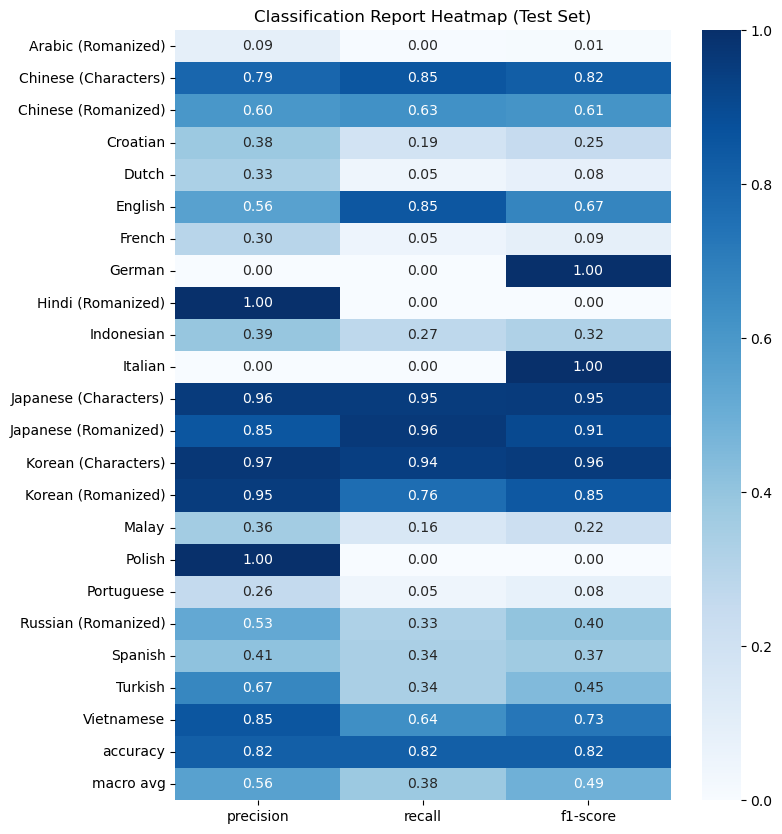

In [12]:
report = classification_report(y_test, y_pred, zero_division=1, output_dict = True)

# Convert the classification report to a DataFrame for better visualization
test_report_df = pd.DataFrame(report).transpose()

import seaborn as sns
# Plot the heatmap
plt.figure(figsize = (8, 10))
sns.heatmap(test_report_df.iloc[:-1, :-1], annot = True, cmap = 'Blues', fmt = '.2f')
plt.title('Classification Report Heatmap (Test Set)')
plt.show()

### EXPLANATION of results (k = 35, the best value of k)

Arabic (Romanized):
Precision: 0.09 (Low precision indicates many false positives.)
Recall: 0.00 (Low recall indicates missing a significant number of actual positives.)
F1-Score: 0.01
Support: 217

Chinese (Characters):
High precision and recall suggest good performance for this class.

English:
High precision and recall indicate effective predictions for the English class.

Japanese (Characters) and Japanese (Romanized):
High precision, recall, and F1-scores suggest excellent performance for these classes.

Korean (Romanized):
A relatively high F1-score suggests good balance between precision and recall.

Russian (Romanized) and Spanish:
Moderate precision and recall indicate decent performance for these classes.

Polish:
High precision but low recall; the model might be overly conservative in predicting this class.

Portuguese:
Similar to Polish, high precision but low recall.

Turkish:
Relatively high precision and recall suggest good overall performance for this class.

Vietnamese:
High precision and recall suggest good performance for this class.

Important Notes:
Model appears to perform well on classes like Chinese, English, Japanese, and Korean, as indicated by high precision, recall, and F1-scores.

Some classes, such as Arabic (Romanized), Portuguese, Polish, and Russian (Romanized), have lower precision and recall, indicating challenges in predicting these classes accurately.

For classes with low support (Croatian, Dutch, German, etc), there's a small number of instances -> interpret the performance metrics with caution

The macro average and weighted average provide a summary of the overall model performance. Here, the macro average shows lower values, indicating challenges in handling multiple classes.

(Consider the specific characteristics of each class and whether precision or recall is more critical based on the application. It might be necessary to adjust the model or explore different features to improve performance on specific classes.)